<a href="https://colab.research.google.com/github/Kiranshankarbhat007/Data-Science-and-ML-Projects-/blob/master/Churn_modeling_ANN_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are crreating a ANN model to predict whether a coustemer of a bank will exit the bank or not in the future.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [112]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [114]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [115]:
Geo = pd.get_dummies(data['Geography'],drop_first=True)


In [116]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)

In [117]:
data.drop(['Geography','Gender'],axis=1,inplace=True)

In [118]:
data_2 = pd.concat([data,Gender,Geo],axis=1)

In [119]:
data_2.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [120]:
data_2.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [121]:
data_2.shape

(10000, 12)

In [122]:
data_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [123]:
x = data_2.drop(('Exited'),axis=1)
y = data_2['Exited']

In [124]:
x.shape

(10000, 11)

In [125]:
y.shape

(10000,)

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [128]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ELU, PReLU
from keras.layers import Dropout

In [129]:
classifier = Sequential()

In [130]:
# Adding the Input Layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu',input_dim=11))

In [131]:
# Adding the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
#classifier.add(Dropout(0.2))

# Adding the Second Hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
#classifier.add(Dropout(0.2))

In [132]:
# output layer

classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [133]:
# compilling the ANN model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [139]:
model_history = classifier.fit(x_train,y_train, validation_split=0.33, batch_size=20,epochs=50)

Epoch 1/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8546 - val_loss: 0.3462 - val_accuracy: 0.8580
Epoch 2/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8552 - val_loss: 0.3448 - val_accuracy: 0.8580
Epoch 3/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8554 - val_loss: 0.3428 - val_accuracy: 0.8622
Epoch 4/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8543 - val_loss: 0.3471 - val_accuracy: 0.8531
Epoch 5/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8558 - val_loss: 0.3441 - val_accuracy: 0.8591
Epoch 6/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8567 - val_loss: 0.3427 - val_accuracy: 0.8633
Epoch 7/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8565 - val_loss: 0.3435 - val_accuracy: 0.8599
Epoch 

In [140]:
y_pre = classifier.predict(x_test)
y_pre = (y_pre>0.5)

In [141]:
y_pre

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)

cm

array([[1534,   67],
       [ 216,  183]])

In [143]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pre,y_test)

score

0.8585

In [145]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


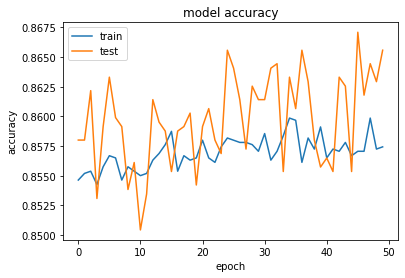

In [146]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


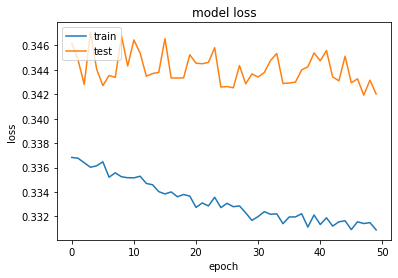

In [147]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()